<a href="https://colab.research.google.com/github/Yassmina-Abdo/deep-learning/blob/main/01_CIFAR_10_SimpleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random

## Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Insights

In [3]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


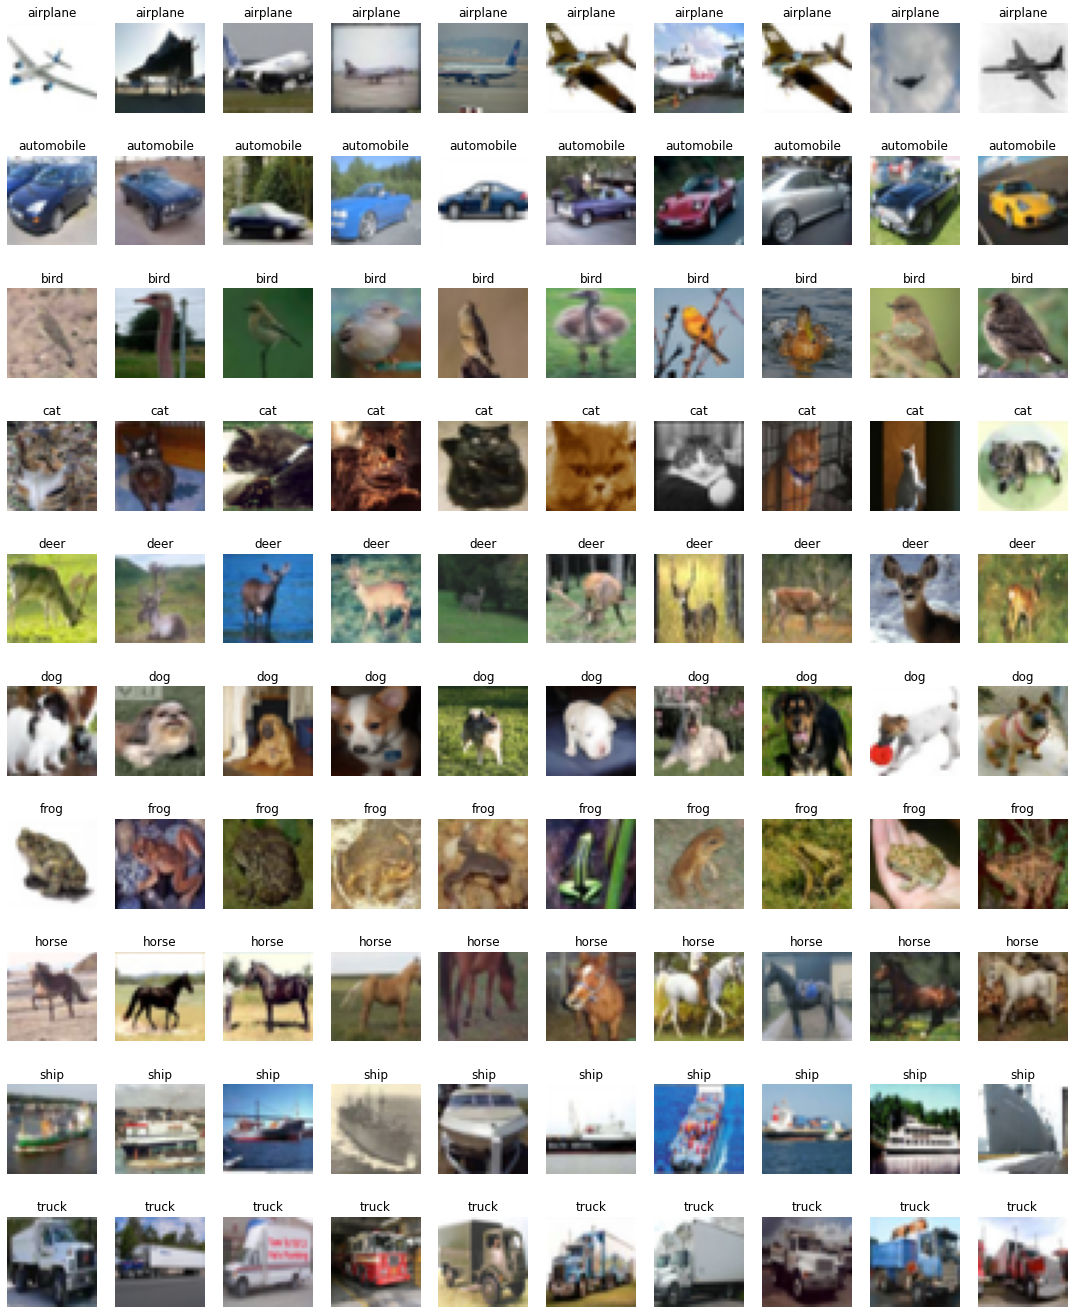

In [5]:
# SHOW IMAGE
cols = 10
rows = 10
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        index,_ = random.choice([(k, p) for k, row in enumerate(train_labels) for p, val in enumerate(row) if val == i])
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(train_images[index, :])
        ax.set_title(cifar10_classes[i])
plt.show()

## Preprocessing

In [6]:
#reshape
train_images = train_images.reshape(50000, 32 * 32 * 3)
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape(10000, 32 * 32 * 3)
test_images = test_images.astype('float32') / 255.0

In [7]:
# One hot encoding for Y
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Model

In [8]:
# Train and test a model with 3 fully connected layers with the following architecture: 512-256-128

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer1', input_shape=(32 * 32 * 3, )))
network.add(layers.Dense(256, activation='relu', name='Layer2'))
network.add(layers.Dense(128, activation='relu', name='Layer3'))
network.add(layers.Dense(10, activation='softmax', name='Output_Layer'))

In [9]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 512)               1573376   
                                                                 
 Layer2 (Dense)              (None, 256)               131328    
                                                                 
 Layer3 (Dense)              (None, 128)               32896     
                                                                 
 Output_Layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


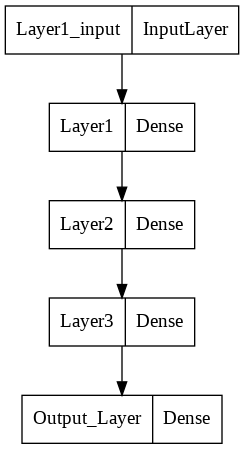

In [10]:
plot_model(network)

In [11]:
# Use adam optimizer with learning rate=10e-3
optimizer = Adam(learning_rate=10e-3)
network.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
network_history = network.fit(train_images,train_labels , epochs=100, batch_size=1024,
                              validation_data=(test_images,test_labels),
                              callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/100
49/49 [==============================] - 9s 166ms/step - loss: 5.7196 - accuracy: 0.1654 - val_loss: 1.9724 - val_accuracy: 0.2654
Epoch 2/100
49/49 [==============================] - 8s 161ms/step - loss: 1.9280 - accuracy: 0.2861 - val_loss: 1.8987 - val_accuracy: 0.3049
Epoch 3/100
49/49 [==============================] - 8s 160ms/step - loss: 1.8111 - accuracy: 0.3374 - val_loss: 1.7830 - val_accuracy: 0.3554
Epoch 4/100
49/49 [==============================] - 8s 161ms/step - loss: 1.7516 - accuracy: 0.3636 - val_loss: 1.7460 - val_accuracy: 0.3675
Epoch 5/100
49/49 [==============================] - 8s 169ms/step - loss: 1.7304 - accuracy: 0.3714 - val_loss: 1.7419 - val_accuracy: 0.3764
Epoch 6/100
49/49 [==============================] - 9s 173ms/step - loss: 1.7020 - accuracy: 0.3837 - val_loss: 1.6916 - val_accuracy: 0.3841
Epoch 7/100
49/49 [==============================] - 8s 172ms/step - loss: 1.6833 - accuracy: 0.3906 - val_loss: 1.6772 - val_accuracy: 0.3909

## Plotting Result

In [12]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

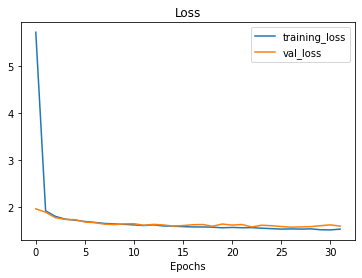

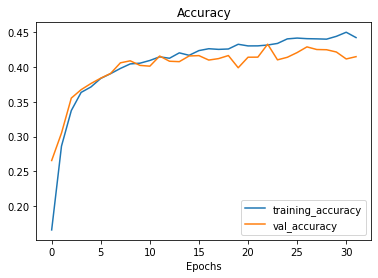

In [13]:
plot_loss_curves(network_history)